In [15]:
# Python 3 Environment
# Import useful libraries for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [18]:
df = pd.read_csv('input/COVID-19 Coronavirus.csv')

In [19]:
df.drop(columns=['Other names'], inplace=True)
df.columns = ['Country', 'CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Cases Per Million', 'Deaths Per Million', 'Death Percentage']
df

,Country,CODE,Population,Continent,Total Cases,Total Deaths,Cases Per Million,Deaths Per Million,Death Percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [20]:
df.shape

(225, 9)

In [21]:
df.describe()

,Population,Total Cases,Total Deaths,Cases Per Million,Deaths Per Million,Death Percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [22]:
# No missing values, does not require data cleaning
df.isnull().any()

Country               False
CODE                  False
Population            False
Continent             False
Total Cases           False
Total Deaths          False
Cases Per Million     False
Deaths Per Million    False
Death Percentage      False
dtype: bool

In [23]:
df.sort_values(by="Total Cases",ascending=False)[['Country','Population','Total Cases','Total Deaths']].reset_index(drop=True).head()

,Country,Population,Total Cases,Total Deaths
0,USA,334400597,81839052,1008222
1,India,1403754381,43029044,521388
2,Brazil,215204501,29999816,660269
3,France,65526369,25997852,142506
4,Germany,84252947,21646375,130563


In [24]:
# USA has the most number of cases by nearly double the second place
# India has a significantly larger population but fewer cases
# Account for this inaccuracy by using Tot Cases/1M pop

In [25]:
df.sort_values(by=['Cases Per Million'],ascending=False).reset_index(drop=True)

,Country,CODE,Population,Continent,Total Cases,Total Deaths,Cases Per Million,Deaths Per Million,Death Percentage
0,Faeroe Islands,FRO,49188,Europe,34237,28,696044,569,0.081783
1,Iceland,ISL,345120,Europe,181830,101,526860,293,0.055546
2,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
3,Gibraltar,GIB,33673,Europe,16979,101,504232,2999,0.594852
4,Denmark,DNK,5827911,Europe,2919428,5762,500939,989,0.197367
...,...,...,...,...,...,...,...,...,...
220,Macao,MAC,664828,Asia,82,0,123,0,0.000000
221,Marshall Islands,MHL,59889,Oceania,7,0,117,0,0.000000
222,China,CHN,1439323776,Asia,154738,4638,108,3,2.997325
223,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000


In [ ]:
# Notice that this is also an inaccurate representation 
# Countries with an extremely small population with few cases get skewed higher than needed
# Plot the graph out against all possible y's

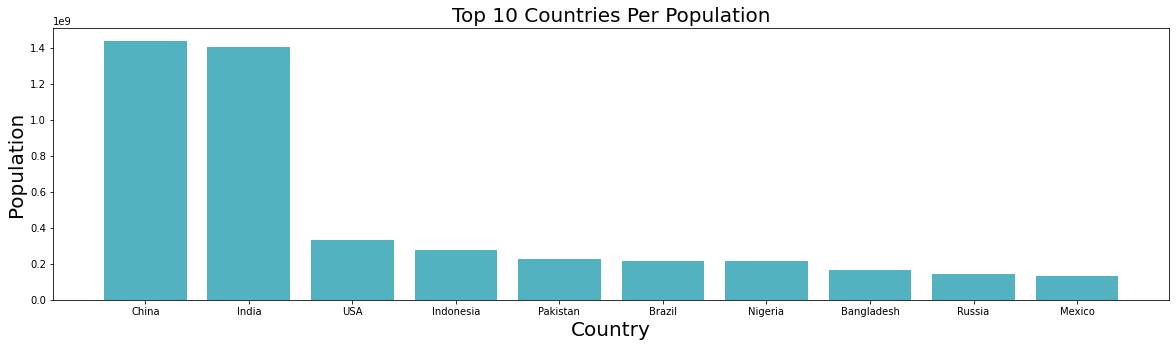

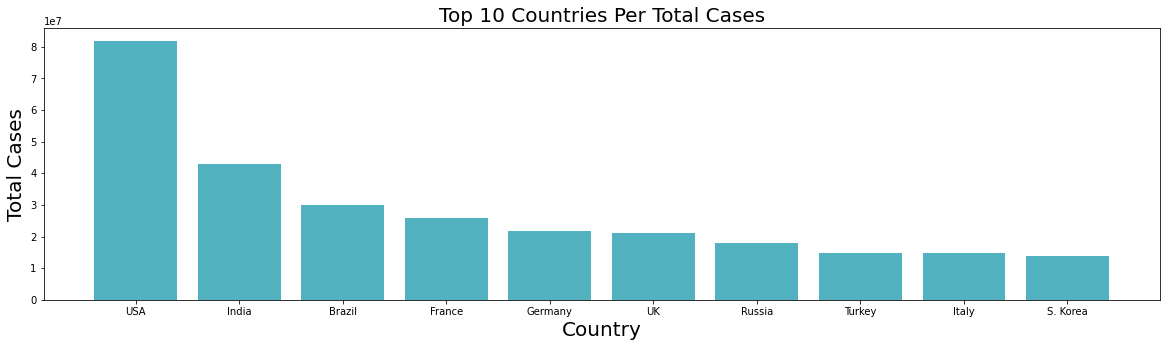

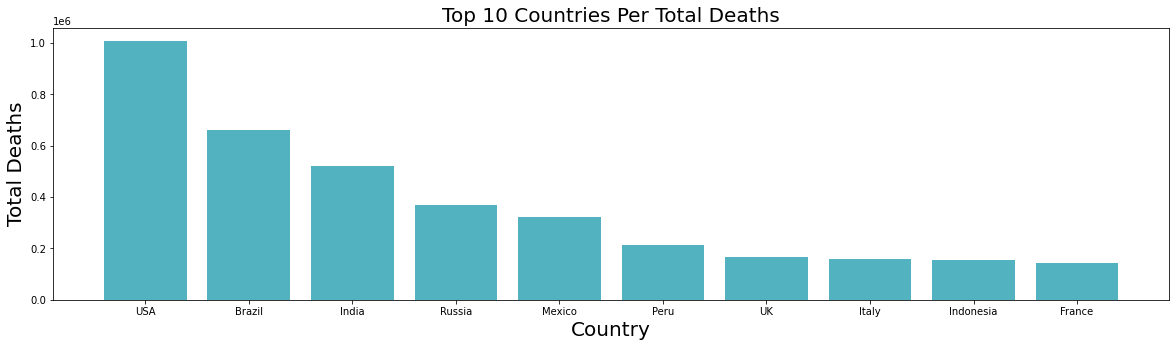

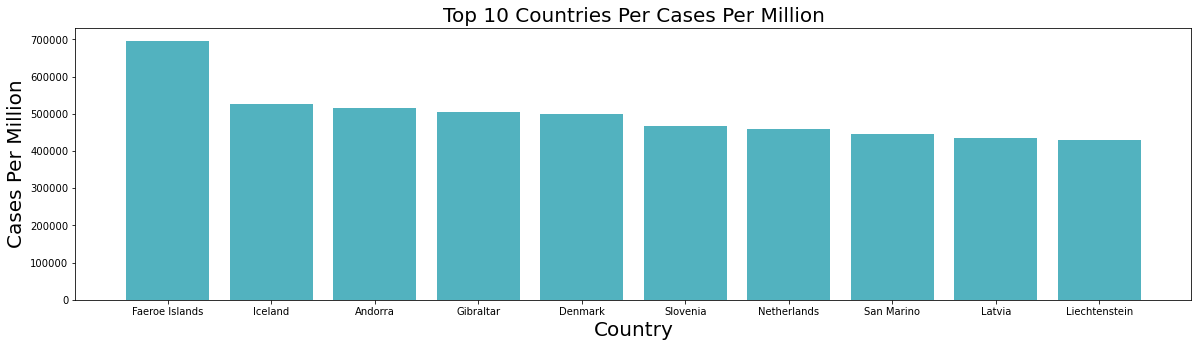

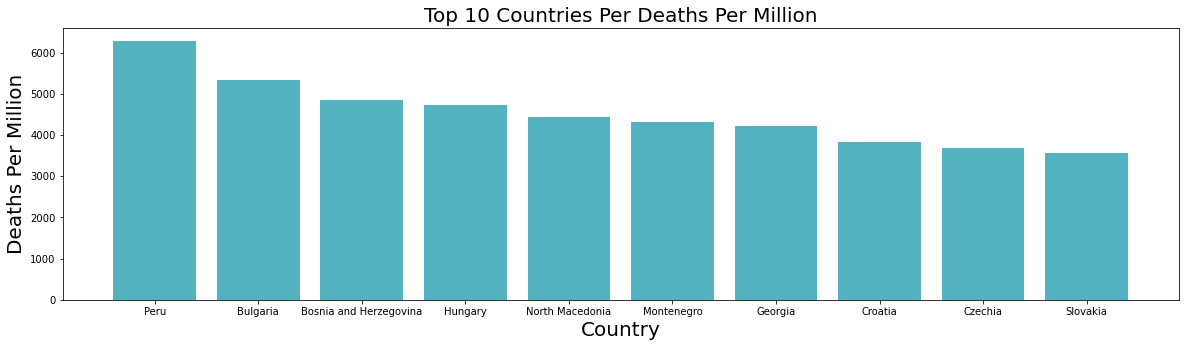

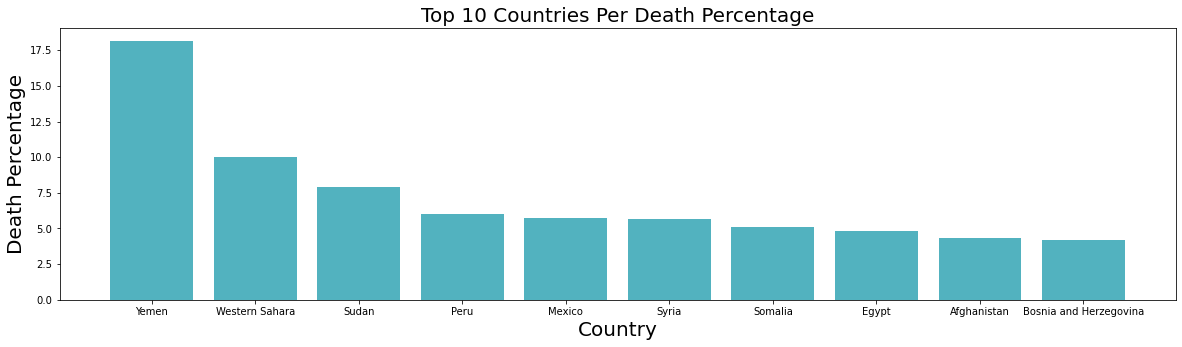

In [32]:
columns = ['Population', 'Total Cases', 'Total Deaths', 'Cases Per Million', 'Deaths Per Million','Death Percentage']

for c in columns:
    top = df.nlargest(10, c)
    plt.figure(figsize=(20,5))
    plt.bar(top['Country'], top[c],color='#52B2BF',alpha=1)
    plt.xlabel('Country', fontsize=20)
    plt.ylabel(c, fontsize=20)
    plt.title('Top 10 Countries Per ' + c, fontsize=20)
    plt.show()